In [1]:
!unzip MNIST_1.zip

Streaming output truncated to the last 5000 lines.
 extracting: MNIST/Train/3/4377.png  
 extracting: MNIST/Train/3/0507.png  
 extracting: MNIST/Train/3/2257.png  
 extracting: MNIST/Train/3/1555.png  
 extracting: MNIST/Train/3/1828.png  
 extracting: MNIST/Train/3/1524.png  
 extracting: MNIST/Train/3/1536.png  
 extracting: MNIST/Train/3/5820.png  
 extracting: MNIST/Train/3/0515.png  
 extracting: MNIST/Train/3/4932.png  
  inflating: MNIST/Train/3/4447.png  
 extracting: MNIST/Train/3/3688.png  
 extracting: MNIST/Train/3/5083.png  
  inflating: MNIST/Train/3/4215.png  
 extracting: MNIST/Train/3/2399.png  
  inflating: MNIST/Train/3/2048.png  
 extracting: MNIST/Train/3/5498.png  
 extracting: MNIST/Train/3/2793.png  
 extracting: MNIST/Train/3/1894.png  
 extracting: MNIST/Train/3/0639.png  
 extracting: MNIST/Train/3/2822.png  
 extracting: MNIST/Train/3/0828.png  
 extracting: MNIST/Train/3/1292.png  
 extracting: MNIST/Train/3/5985.png  
 extracting: MNIST/Train/3/3052.png  

In [2]:
import numpy as np
import imageio
import glob

def load_mnist():
    # Loads the MNIST dataset from png images

    NUM_LABELS = 10
    # create list of image objects
    test_images = []
    test_labels = []

    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Test/" + str(label) + "/*.png"):
            image = imageio.imread(image_path)
            test_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]
            letter[label] = 1
            test_labels.append(letter)

    # create list of image objects
    train_images = []
    train_labels = []

    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Train/" + str(label) + "/*.png"):
            image = imageio.imread(image_path)
            train_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]
            letter[label] = 1
            train_labels.append(letter)

    X_train= np.array(train_images).reshape(-1,784)/255.0
    Y_train= np.array(train_labels)
    X_test= np.array(test_images).reshape(-1,784)/255.0
    Y_test= np.array(test_labels)

    return X_train, Y_train, X_test, Y_test


In [3]:
X_train,Y_train,X_test,Y_test = load_mnist()


<ipython-input-2-fdf5f0f0b592>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
<ipython-input-2-fdf5f0f0b592>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


In [4]:
print("X_train shape = ", X_train.shape)
print("Y_train shape = ", Y_train.shape)
print("X_test shape = ", X_test.shape)
print("Y_test shape = ", Y_test.shape)


X_train shape =  (60000, 784)
Y_train shape =  (60000, 10)
X_test shape =  (10000, 784)
Y_test shape =  (10000, 10)


In [5]:
from sklearn.utils import shuffle

X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
X_test, Y_test = shuffle(X_test, Y_test, random_state=42)

In [6]:

def init_params(X_train,Y_train):
  #w1 has to be shape 784,10
  #w1 = np.random.normal(0,0.01,(X_train.shape[1],10))
  w1 = np.random.randn(X_train.shape[1], 100) * 0.01
  b1 = np.zeros((100,1))
  #Z here has shape 60k,10. We want result of
  #w2 has to be of shape
  #w2 = np.random.normal(0,0.01,(10,10))
  w2 = np.random.randn(100, 10) * 0.01
  b2 = np.zeros((10,1))
  return w1,b1,w2,b2

In [7]:
w1,b1,w2,b2 = init_params(X_train,Y_train)
#print(w.shape,b.shape)

In [8]:
import numpy as np

def relu(Z):
  return np.maximum(0,Z)

def softmax(Z):
  exp_Z = np.exp(Z)
  exp_Z_sum = np.sum(exp_Z, axis=1, keepdims=True)
  return exp_Z / exp_Z_sum

In [9]:
def linear_forward(X_train,w,b):
  z = np.dot(X_train,w) + b.T
  return z

In [10]:
def activation_forward(z):
  return relu(z)

In [11]:

def model_forward(X_train,w1,b1,w2,b2):

  #First layer
  z1 = linear_forward(X_train,w1,b1)
  h1 = activation_forward(z1)
  #print("This is X ",h1)
  #Second layer
  #This is the last layer linear ouput
  z2 = linear_forward(h1,w2,b2)
  h2 = softmax(z2)

  #cache creation is explained in later functions, but cache will have the form of (Z,w,b,X)
  cache = [(z1,w1,b1,X_train),(h2,w2,b2,h1)]
  #print("THis is x_train, ",X_train)
  #print(w1.shape,b1.shape,w2.shape,b2.shape)
  return h2,cache

In [12]:
def compute_loss(Z,Y_train):
#So, Y_train is of shape (60k,10) so each row consists of 0-9 cells, with 1 on the index where the correct label for the digit is
#Also, Z has shape (60k,10) as well. Z_i symbolises (1,10), so one example. So, sum (e^Z_i_l) from l=1 until M, we basically add for a single sample the columns
  #print(Z.shape,Y_train.shape)
  max_values = np.max(Z, axis=1, keepdims=True)
  stable_values = Z - max_values
  exp_values = np.exp(stable_values)
  row_sums = np.sum(exp_values, axis=1)
  L = np.log(row_sums)
  L = L - np.sum(Y_train*Z,axis=1) #(60k,10),(10,60k) --> 60k,60k ->60k,1
  J = (1/Y_train.shape[0])*(np.sum(L))
  return J

In [13]:
def linear_backward(dl_dz,cache):
  #Based on test in class:
  #Lets say Z is the linear output of a layer and dl/dz is the gradient of the loss in respect to output Z. To propagate that backwards we do :
  #print("Checking X in linear backward", X)
  Z, W, b, X = cache
  dl_dx = np.dot(dl_dz,W.T)
  #print(f"lets check: X = {X} , X.shape = {X.shape} , dl_dz = {dl_dz}, dl_dz.shape = {dl_dz.shape}")
  dl_dw= np.dot(X.T, dl_dz)
  #print("My dl_dw is :," , dl_dw.shape)
  #Here is the problem

  #dl_dw= np.dot(X, dl_dz)
  dl_db = np.sum(dl_dz, axis=0, keepdims=True).T
  # print("my dl_db shape is :",dl_db.shape)
  return dl_dx,dl_dw,dl_db

In [14]:
def relu_backward(dl_da,cache):
  #If the value of the input of relu is positive, then the partial derivative of the loss over the relu is 1, else 0
  #dl_da is gradient of loss function of the output of the relu
  #Z is input of relu fucntion
  Z, W, b, X = cache
  return dl_da*(Z>0) #Basically if Z>0 then return dl_da otherwise return 0


In [15]:
def activation_backward(dl_da,cache,last_layer):
  # backward propagation with the desired activation function for one layer.
  # we need the stored values to pass them into the functions correctly.
  #Basically, during forward propagation we save the input, weights and output of that layer. Then during backpropagation, along with the partial derivative of the loss
  #function over the output and the above varialbes, we can propagate the gradient backwards. (In this case, dl_da is like dl_ds1 in the test in class.)
  Z, W, b,X = cache

  #We should check if we are at the last layer. If we are, we first do linear backward, then relu backward and then one more linear backward

  if last_layer==1:
    dl_dx,dl_dw,dl_db = linear_backward(dl_da, X, W, b)
    #print(dl_da.shape)
    return dl_dx,dl_dw,dl_db

  #print("My X is :",X)
  #dl_da is the gradient with respect to the final output
  dl_dz = relu_backward(dl_da, Z)
  #print("My dl_dz is :",dl_dz)
  dl_dx,dl_dw,dl_db = linear_backward(dl_dz, X, W, b)
  #print("dl_dw shape, dl_db shape :",dl_dw,dl_db)
  return dl_dx,dl_dw,dl_db

In [16]:
def activation_backward_simple(dl_da,cache,last_layer):

  if last_layer:
    dl_dz = dl_da  # Start of backpropagation
  else:
    Z, W, b, X = cache
    dl_dz = relu_backward(dl_da, cache)

  dl_dx, dl_dw, dl_db = linear_backward(dl_dz, cache)
  return dl_dx, dl_dw, dl_db

In [17]:
def model_backward_simple(y_pred,Y_train,cache):

  num_layers = len(cache) #2

  dl_da = (1/Y_train.shape[0]) * (cache[1][0] - Y_train)  # Gradient with respect to last layer output
  gradients = {}

  # Last Layer
  gradients["dl_dx"+str(num_layers)], gradients["dl_dw"+str(num_layers)], gradients["dl_db"+str(num_layers)] = activation_backward_simple(dl_da, cache[num_layers-1], last_layer=1)

  for layer in reversed(range(num_layers-1)):


    #Layer has value 0
  # First Layer
    gradients["dl_dx"+str(layer+1)], gradients["dl_dw"+str(layer+1)], gradients["dl_db"+str(layer+1)] = activation_backward_simple(gradients["dl_dx"+str(layer+2)], cache[layer], last_layer=0)
  return gradients

In [18]:
def  model_backward(y_pred,Y_train,cache):



  """ This was my try for custom number of layers but its not used in this .ipynb. The model_backward_simple is used instead."""


  # To do the whole backpropagation process, we will start from the last output layer and calculate the gradients there.
  # After that, we will go one layer backwards and use the gradients recorded from the last layer and use activation_backwards again and so on
  # As we can see, we need to save the gradients of each layer to pass them as arguments to the previous one
  # Best way to do this is creating a dictionary with keys the gradient and the number of layer they were computed from (ex: "dl_dw2"= 4, --> gradient dl_dw from layer 2 has value 4)

  #So, since we start from the last layer, we need as args to the function :
  # y_pred : Our prediction, the output of the last layer
  # Y_train : The true output
  # Inputs and linear output of layer we are working with, named cache (Z,w,b,X)

  #Initialize the gradients dictionary
  gradients ={}

  # We can get how many layers the network has by checking the length of our cache
  layers = len(cache) # 2

  #Start the backwards process, we start from the last layer

  current_cache = cache[layers-1] #-1 for index correction

  print(current_cache[0])

  #print("In current cache, my W parameter is : ",current_cache[1])

  # print("In current cache, W has shape :",current_cache[1].shape)
  # print("In current cache, b has shape :",current_cache[2].shape)

  # Calculate activation_backward of the last layer and save the outputs in the gradients dictionary
  #print("dl_dx"+str(layers+1))

  gradients["dl_da"],gradients["dl_dw"+str(layers)],gradients["dl_db"+str(layers)] = activation_backward((1/64)*(current_cache[0]-Y_train),current_cache,last_layer=1)

  #here, dl_dx is basically the output of the previous layer, so from the point of view of the previous layer, its dl_da

  #Now that we have the last layer, we can iterate backwards through the other layers

  for layer in reversed(range(layers-1)):

    #Get currect cache
    current_cache = cache[layer]
    #print("It should match: ", current_cache[-1])

    #To get the grads of the layer, call activation_backward with dl_da and currect cache.
    #Since we are one layer backwards, the next layer is layer+1

    #print("//////////////////PREVIOUS LAYERS///////////////////")


    gradients["dl_dx"+str(layer+1)],gradients["dl_dw"+str(layer+1)],gradients["dl_db"+str(layer+1)] = activation_backward(gradients["dl_da"],current_cache,last_layer=0)

  return gradients


In [19]:
def update_parameters(cache,gradients,alpha):
  #Depending on the layer we are on, we want to update our parameters accordingly
  #That means go through the dictionary of gradients and find the appropriate ones

  #Args to the function will be :
  # Cache : contains the parameters Z, W, b,X
  # gradients : contains dictionary of the gradients depending on the layer
  # learning rate

  #Output of function will be the updated cache
  #If time allows it i will try to make it work for an arbitary number of layers

  #print(gradients["dl_dw"+str(1)])


  w1 = cache[0][1] - alpha*gradients["dl_dw"+str(1)]
  b1 = cache[0][2] - alpha*gradients["dl_db"+str(1)]
  w2 = cache[1][1] - alpha*gradients["dl_dw"+str(2)]
  b2 = cache[1][2] - alpha*gradients["dl_db"+str(2)]

  #checked that they have correct shapes

  return w1,b1,w2,b2


In [20]:
def predict(X_train,Y_train,w1,b1,w2,b2):



    y_pred , _ = model_forward(X_train,w1,b1,w2,b2)
    J = compute_loss(y_pred,Y_train)
    accuracy = compute_accuracy(y_pred,Y_train)

    return y_pred,J,accuracy



In [21]:
def random_mini_batches(X, Y, batch_size=64, seed=42):

  np.random.seed(seed)  # Ensure reproducibility

  m = X.shape[0]  # Number of training examples
  mini_batches = []  # Will store our mini-batches

  # Shuffle data (X and Y should be shuffled together)
  permutation = list(np.random.permutation(m))
  X_shuffled = X[permutation, :]
  #print("X",X)
  Y_shuffled = Y[permutation, :]

  # Partition into mini-batches
  num_complete_batches = m // batch_size
  for k in range(num_complete_batches):
    start = k * batch_size
    end = start + batch_size
    x_mini = X_shuffled[start:end, :]
    y_mini = Y_shuffled[start:end, :]
    yield x_mini, y_mini

  # Handling the last (possibly smaller) mini-batch
  if m % batch_size != 0:
    start = num_complete_batches * batch_size
    end = m
    x_mini = X_shuffled[start:end, :]
    y_mini = Y_shuffled[start:end, :]
    yield x_mini, y_mini


In [22]:
def compute_accuracy(y_pred, y_mini):

  predictions = np.argmax(y_pred, axis=1)  # Get predicted class from softmax output
  correct_labels = np.argmax(y_mini, axis=1)  # Get true class labels

  correct_predictions = np.sum(predictions == correct_labels)
  accuracy = correct_predictions / y_mini.shape[0]  # Percentage of correct predictions
  return accuracy

In [29]:
def train_model(X_train,Y_train,epochs,learning_rate,batch_size):
  losses = []
  acc = []
  losses_test = []
  acc_test = []

  w1,b1,w2,b2 = init_params(X_train,Y_train)
  for epoch in range(epochs):
    running_loss = 0
    print("Epoch :",epoch)
    mini_batches = random_mini_batches(X_train, Y_train, batch_size)


    for i,(x_mini, y_mini) in enumerate(mini_batches):
      # Train model on each mini_batch


      y_pred , cache = model_forward(x_mini,w1,b1,w2,b2)

      #print(f"Prediction at step {step} : ",z)
      #Compute the loss
      J = compute_loss(cache[1][0],y_mini) #cache[1][0] is z2
      running_loss += J

      #Compute partial derivatives
      gradients = model_backward_simple(y_pred,y_mini,cache)

      #Update parameters
      w1,b1,w2,b2 = update_parameters(cache,gradients,learning_rate)


    losses.append(running_loss/i)
    accuracy = compute_accuracy(y_pred,y_mini)
    acc.append(accuracy)

    print("Accuracy = ",accuracy)
    print(f'Loss at step {i} : ',running_loss/i)

    _,J_test,accuracy_test= predict(X_train,Y_train,w1,b1,w2,b2)
    losses_test.append(J_test)
    acc_test.append(accuracy_test)
    print("Accuracy on test set = ",accuracy_test)
    print(f'Loss at step {i} of test set : ',J_test)

  return w1,b1,w2,b2,y_pred,losses,acc,losses_test,acc_test

In [40]:
epochs = 200
learning_rate = 0.005
batch_size = 64

w1,b1,w2,b2,y_pred,losses,acc,losses_test,acc_test = train_model(X_train,Y_train,epochs,learning_rate,batch_size)

Epoch : 0
Accuracy =  0.5625
Loss at step 937 :  2.1810885014887003
Accuracy on test set =  0.46091666666666664
Loss at step 937 of test set :  2.115247648114659
Epoch : 1
Accuracy =  0.8125
Loss at step 937 :  1.8779180133991806
Accuracy on test set =  0.7626166666666667
Loss at step 937 of test set :  1.5723149626802924
Epoch : 2
Accuracy =  0.8125
Loss at step 937 :  1.3605150011616014
Accuracy on test set =  0.8296666666666667
Loss at step 937 of test set :  1.19835529495407
Epoch : 3
Accuracy =  0.8125
Loss at step 937 :  1.1082004411619888
Accuracy on test set =  0.85865
Loss at step 937 of test set :  1.0328868046954593
Epoch : 4
Accuracy =  0.8125
Loss at step 937 :  0.9853087098821106
Accuracy on test set =  0.8736833333333334
Loss at step 937 of test set :  0.9423540770327294
Epoch : 5
Accuracy =  0.84375
Loss at step 937 :  0.9131919091768418
Accuracy on test set =  0.8835166666666666
Loss at step 937 of test set :  0.8853253575649579
Epoch : 6
Accuracy =  0.875
Loss at step

In [41]:
y_pred,J,accuracy= predict(X_test,Y_test,w1,b1,w2,b2)

In [42]:
accuracy

0.9742

In [43]:
from matplotlib import pyplot as plt
import numpy as np
def training_curve_plot(title, train_losses, test_losses, train_accuracy, test_accuracy):

  lg=13
  md=10
  sm=9
  fig, axs = plt.subplots(1, 2, figsize=(12, 4))
  fig.suptitle(title, fontsize=lg)
  x = range(1, len(train_losses)+1)
  axs[0].plot(x, train_losses, label=f'Final train loss: {train_losses[-1]:.4f}')
  axs[0].plot(x, test_losses, label=f'Final test loss: {test_losses[-1]:.4f}')
  axs[0].set_title('Losses', fontsize=md)
  axs[0].set_xlabel('Iteration', fontsize=md)
  axs[0].set_ylabel('Loss', fontsize=md)
  axs[0].legend(fontsize=sm)
  axs[0].tick_params(axis='both', labelsize=sm)
  # Optionally use a logarithmic y-scale
  #axs[0].set_yscale('log')
  axs[0].grid(True, which="both", linestyle='--', linewidth=0.5)
  axs[1].plot(x, train_accuracy, label=f'Final train accuracy: {train_accuracy[-1]:.4f}%')
  axs[1].plot(x, test_accuracy, label=f'Final test accuracy: {test_accuracy[-1]:.4f}%')
  axs[1].set_title('Accuracy', fontsize=md)
  axs[1].set_xlabel('Iteration', fontsize=md)
  axs[1].set_ylabel('Accuracy (%)', fontsize=sm)
  axs[1].legend(fontsize=sm)
  axs[1].tick_params(axis='both', labelsize=sm)
  axs[1].grid(True, which="both", linestyle='--', linewidth=0.5)
  plt.show()

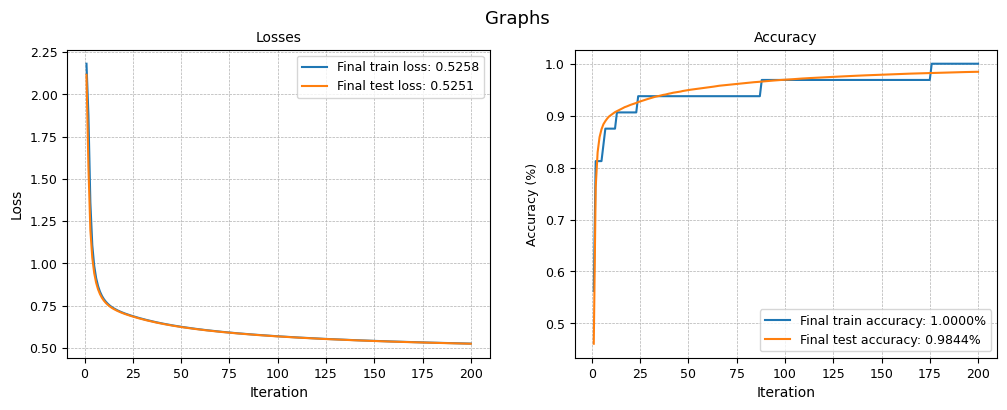

In [44]:
training_curve_plot("Graphs",losses,losses_test,acc,acc_test)